# Bimodal Gaussian Posterior - NPE_A method

In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('..'))


In [2]:
import lfi
import torch
import numpy as np

2024-12-20 13:49:40.524 | INFO     | lfi.config:<module>:11 - PROJ_ROOT path is: C:\Users\Theodora\Documents\master2\sbi


In [3]:
from lfi import priors, simulators
import lfi.inference.from_sbi

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## D=2

### Success: 500

In [4]:
np.random.seed(21355)
torch.manual_seed(21)

In [5]:
D = 2
sim = lfi.simulators.BimodalGaussian(sigma_noise=0.1)
prior = lfi.priors.UniformPrior(low=-10, high=10, dim=D)
observation = np.zeros((1,D))
posterior_modes = np.ones((2,D))
posterior_modes[0, :] = -3
posterior_modes[1, :] = 3

In [6]:
inference = lfi.inference.from_sbi.NPEASingleRound(
    prior=prior.return_sbi_object(),
    simulator=sim.sample_pytorch,
    observation = observation,
)

In [8]:
samples, time = inference.fit_and_sample(budget=500, num_samples=100)

  0%|          | 0/500 [00:00<?, ?it/s]

 Neural network successfully converged after 858 epochs.

Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]


Training/Samling time: 19.43 seconds


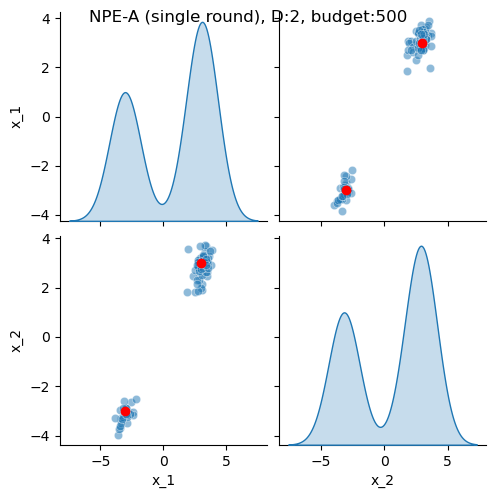

In [12]:
g = inference.plot_posterior_samples(
    samples=samples,
    budget=500,
    posterior_modes=posterior_modes,
    subset_dims=[d for d in range(D)],
)

### budget: 5000

In [4]:
np.random.seed(21355)
torch.manual_seed(21)

In [5]:
D = 2
sim = lfi.simulators.BimodalGaussian(sigma_noise=0.1)
prior = lfi.priors.UniformPrior(low=-10, high=10, dim=D)
observation = np.zeros((1,D))
posterior_modes = np.ones((2,D))
posterior_modes[0, :] = -3
posterior_modes[1, :] = 3

In [6]:
inference = lfi.inference.from_sbi.NPEASingleRound(
    prior=prior.return_sbi_object(),
    simulator=sim.sample_pytorch,
    observation = observation,
)

In [7]:
samples, time = inference.fit_and_sample(budget=5000, num_samples=100)

  0%|          | 0/5000 [00:00<?, ?it/s]

 Neural network successfully converged after 233 epochs.

Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]


Training/Sampling time: 36.08 seconds


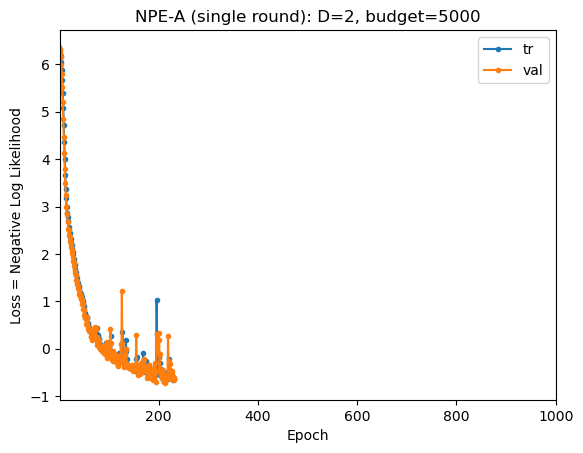

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'NPE-A (single round): D=2, budget=5000'}, xlabel='Epoch', ylabel='Loss = Negative Log Likelihood'>)

In [8]:
inference.plot_training_summary(budget=5_000)

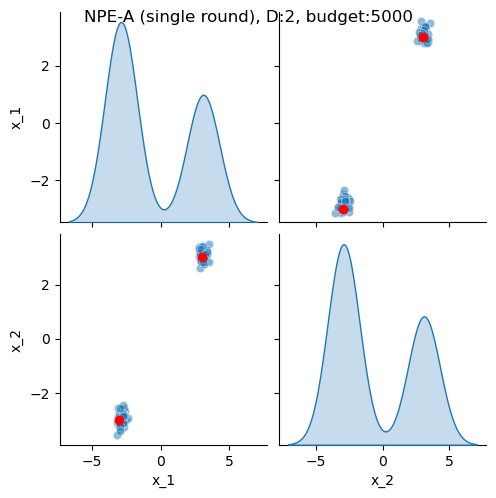

In [9]:
g = inference.plot_posterior_samples(
    samples=samples,
    budget=5000,
    posterior_modes=posterior_modes,
    subset_dims=[d for d in range(D)],
)

# D = 5
## budget: 1000

In [13]:
np.random.seed(21355)
torch.manual_seed(21)

In [14]:
D = 5
sim = lfi.simulators.BimodalGaussian(sigma_noise=0.1)
prior = lfi.priors.UniformPrior(low=-10, high=10, dim=D)
observation = np.zeros((1,D))
posterior_modes = np.ones((2,D))
posterior_modes[0, :] = -3
posterior_modes[1, :] = 3

In [15]:
inference = lfi.inference.from_sbi.NPEASingleRound(
    prior=prior.return_sbi_object(),
    simulator=sim.sample_pytorch,
    observation = observation,
)

In [16]:
samples, time = inference.fit_and_sample(budget=2000, num_samples=100)

  0%|          | 0/2000 [00:00<?, ?it/s]

 Neural network successfully converged after 205 epochs.

Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]


Training/Samling time: 16.88 seconds


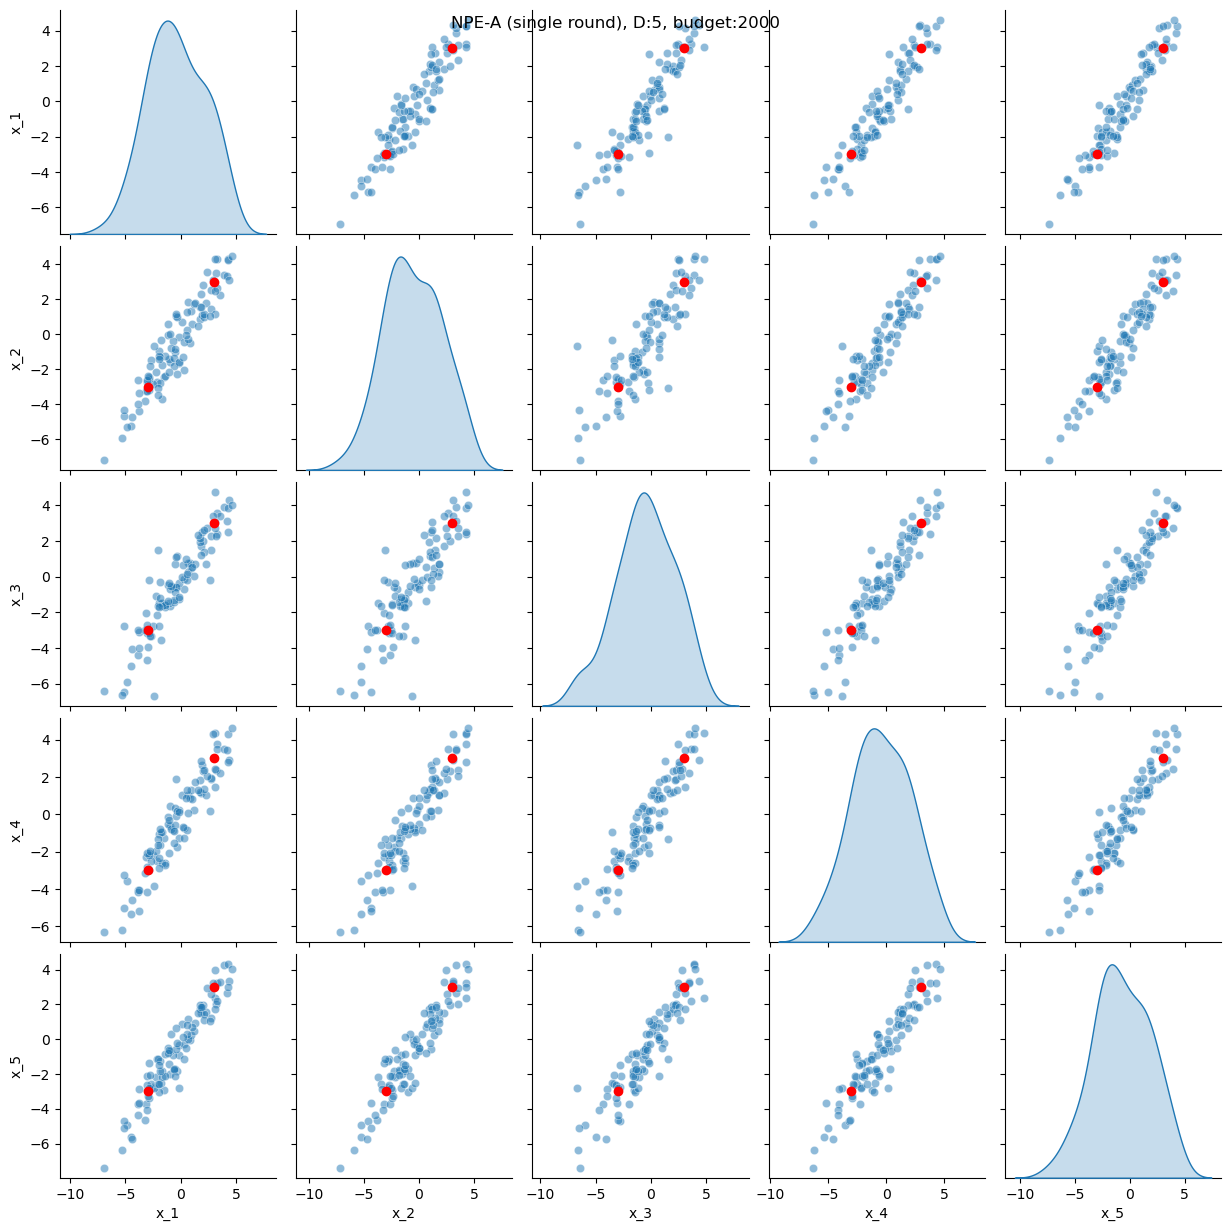

In [17]:
g = inference.plot_posterior_samples(
    samples=samples,
    budget=2000,
    posterior_modes=posterior_modes,
    subset_dims=[d for d in range(D)],
)

## D = 5

### budget: 10_000

In [13]:
np.random.seed(21355)
torch.manual_seed(21)

In [14]:
D = 5
sim = lfi.simulators.BimodalGaussian(sigma_noise=0.1)
prior = lfi.priors.UniformPrior(low=-10, high=10, dim=D)
observation = np.zeros((1,D))
posterior_modes = np.ones((2,D))
posterior_modes[0, :] = -3
posterior_modes[1, :] = 3

In [15]:
inference = lfi.inference.from_sbi.NPEASingleRound(
    prior=prior.return_sbi_object(),
    simulator=sim.sample_pytorch,
    observation = observation,
)

In [16]:
samples, time = inference.fit_and_sample(budget=10000, num_samples=100)

  0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 256 epochs.

Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]


Training/Sampling time: 85.83 seconds


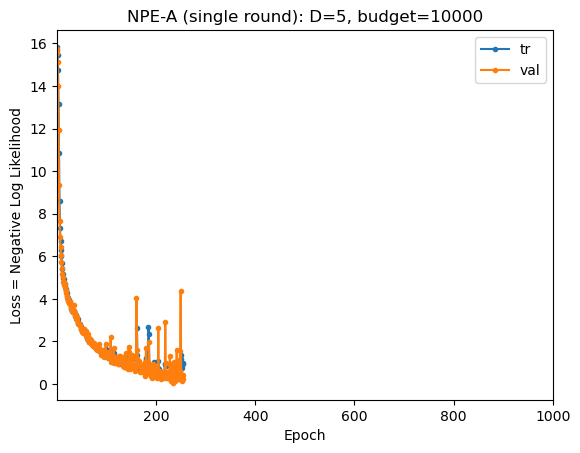

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'NPE-A (single round): D=5, budget=10000'}, xlabel='Epoch', ylabel='Loss = Negative Log Likelihood'>)

In [17]:
inference.plot_training_summary(budget=10_000)

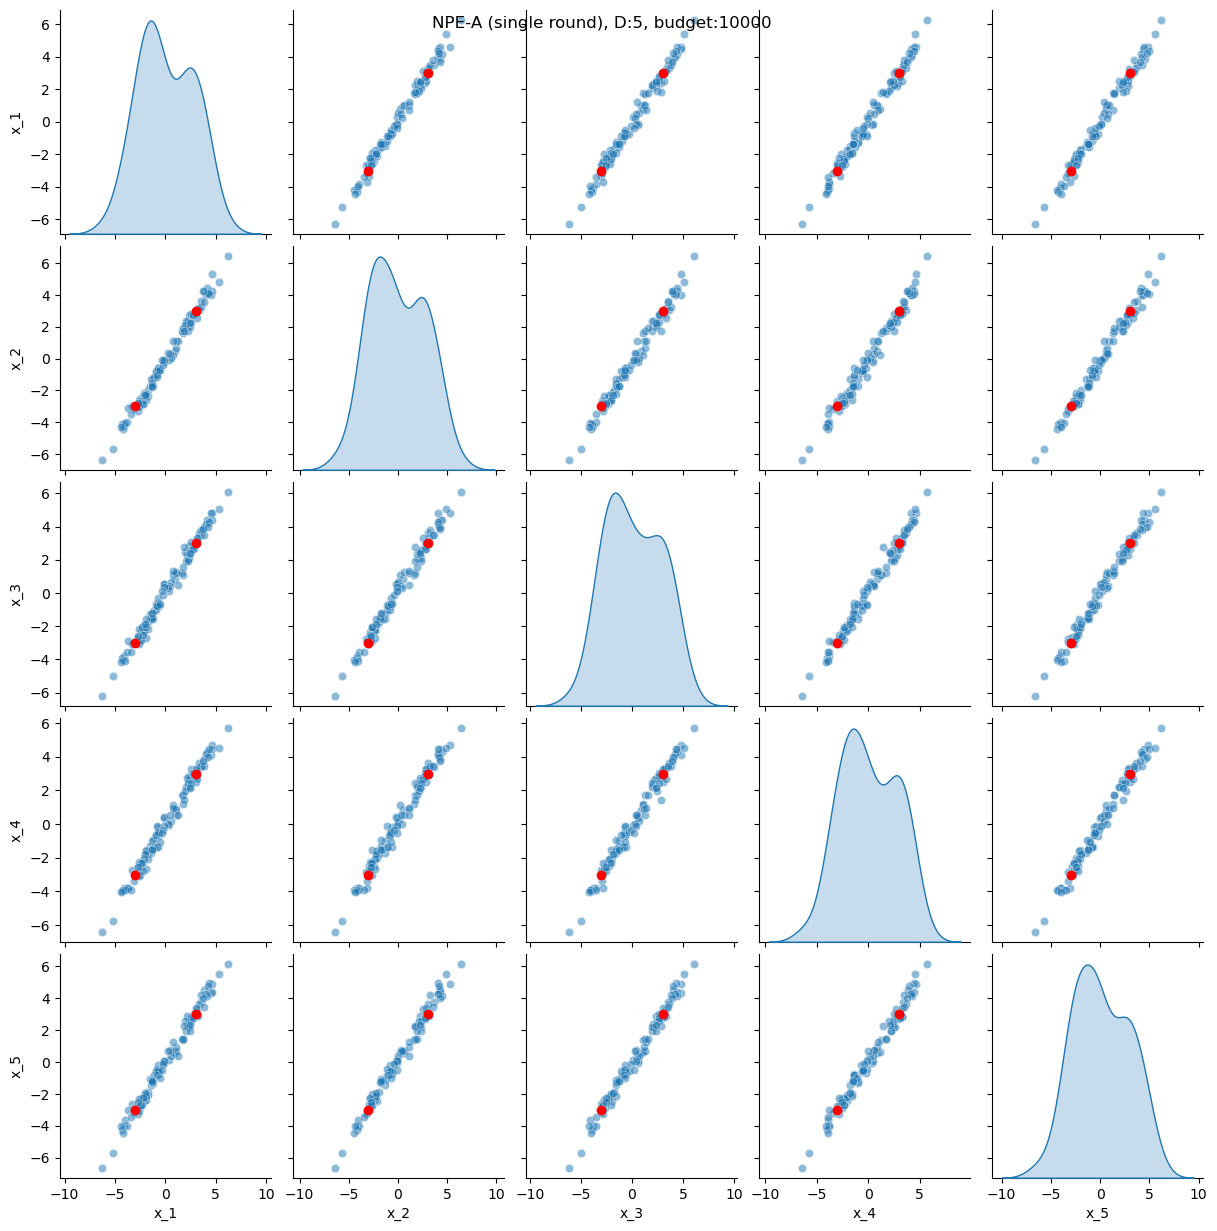

In [18]:
g = inference.plot_posterior_samples(
    samples=samples,
    budget=10000,
    posterior_modes=posterior_modes,
    subset_dims=[d for d in range(D)],
)

### budget: 20_000

In [19]:
np.random.seed(21355)
torch.manual_seed(21)

In [20]:
D = 5
sim = lfi.simulators.BimodalGaussian(sigma_noise=0.1)
prior = lfi.priors.UniformPrior(low=-10, high=10, dim=D)
observation = np.zeros((1,D))
posterior_modes = np.ones((2,D))
posterior_modes[0, :] = -3
posterior_modes[1, :] = 3

In [21]:
inference = lfi.inference.from_sbi.NPEASingleRound(
    prior=prior.return_sbi_object(),
    simulator=sim.sample_pytorch,
    observation = observation,
)

In [22]:
samples, time = inference.fit_and_sample(budget=20000, num_samples=100)

  0%|          | 0/20000 [00:00<?, ?it/s]

 Neural network successfully converged after 171 epochs.

Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]


Training/Sampling time: 114.41 seconds


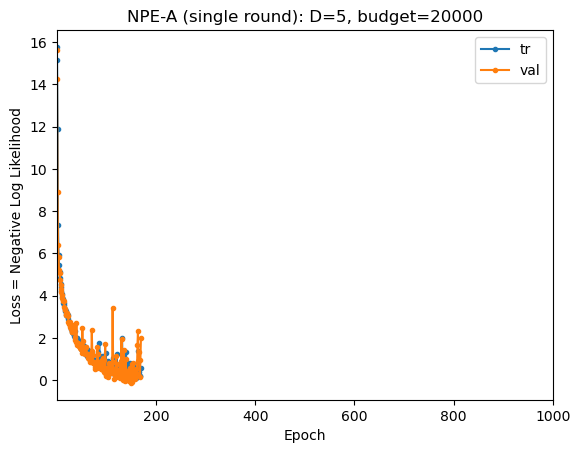

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'NPE-A (single round): D=5, budget=20000'}, xlabel='Epoch', ylabel='Loss = Negative Log Likelihood'>)

In [23]:
inference.plot_training_summary(budget=20_000)

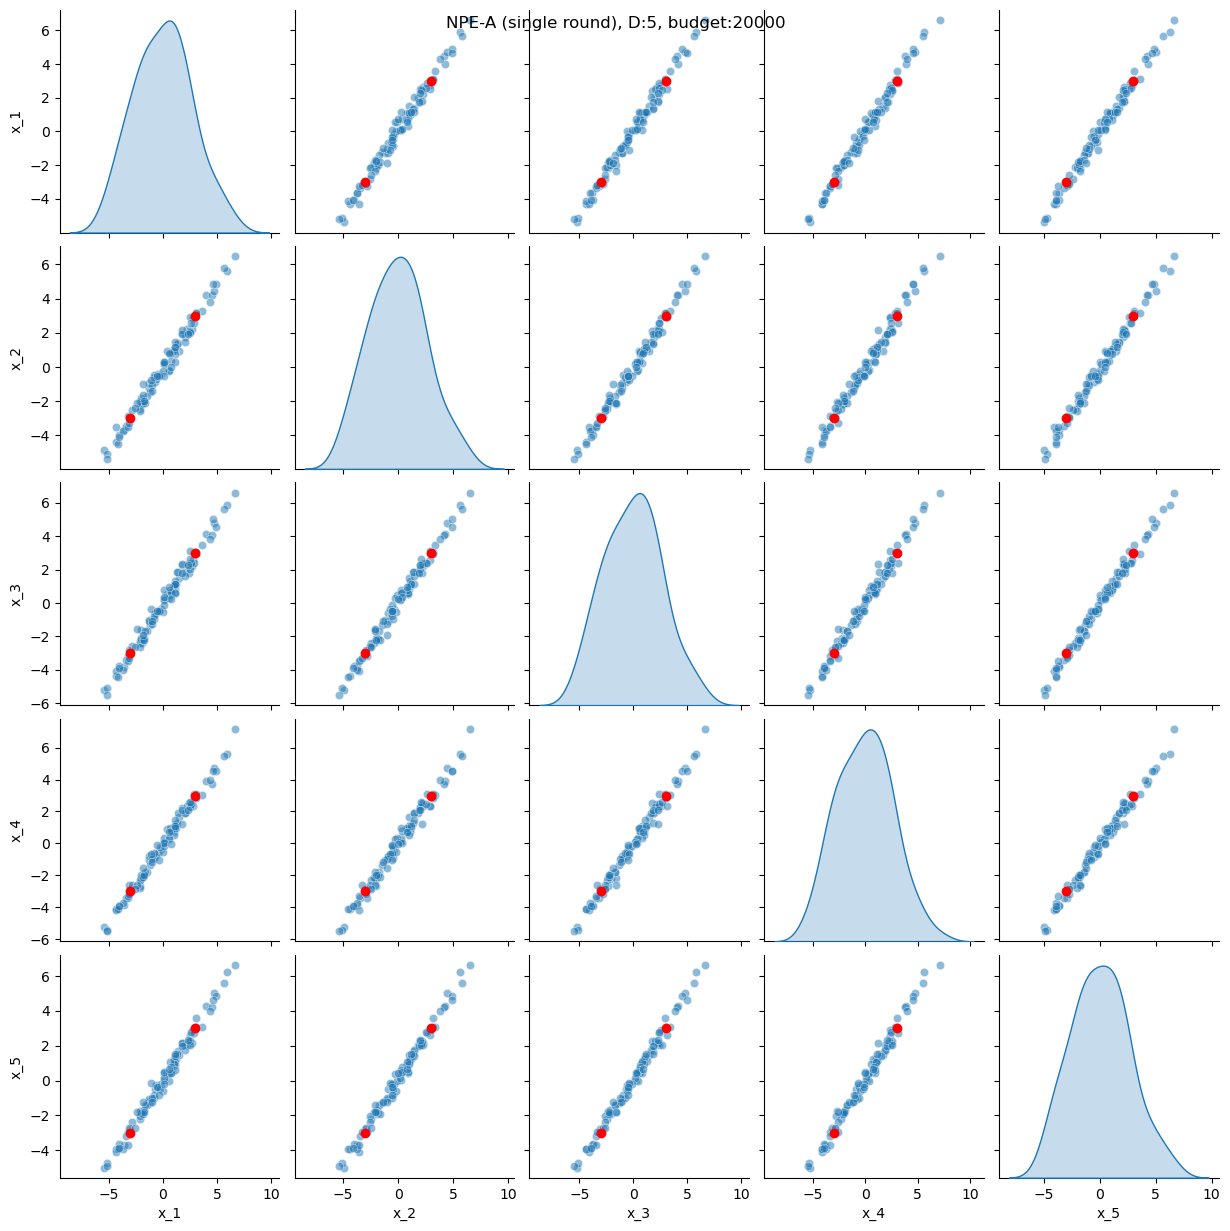

In [24]:
g = inference.plot_posterior_samples(
    samples=samples,
    budget=20000,
    posterior_modes=posterior_modes,
    subset_dims=[d for d in range(D)],
)

### budget: 30_000

In [31]:
np.random.normal(21355)
torch.manual_seed(21)

In [32]:
D = 5
sim = lfi.simulators.BimodalGaussian(sigma_noise=0.1)
prior = lfi.priors.UniformPrior(low=-10, high=10, dim=D)
observation = np.zeros((1,D))
posterior_modes = np.ones((2,D))
posterior_modes[0, :] = -3
posterior_modes[1, :] = 3

In [33]:
inference = lfi.inference.from_sbi.NPEASingleRound(
    prior=prior.return_sbi_object(),
    simulator=sim.sample_pytorch,
    observation = observation,
)

In [34]:
samples, time = inference.fit_and_sample(budget=30000, num_samples=100)

  0%|          | 0/30000 [00:00<?, ?it/s]

 Neural network successfully converged after 135 epochs.

Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]


Training/Sampling time: 134.85 seconds


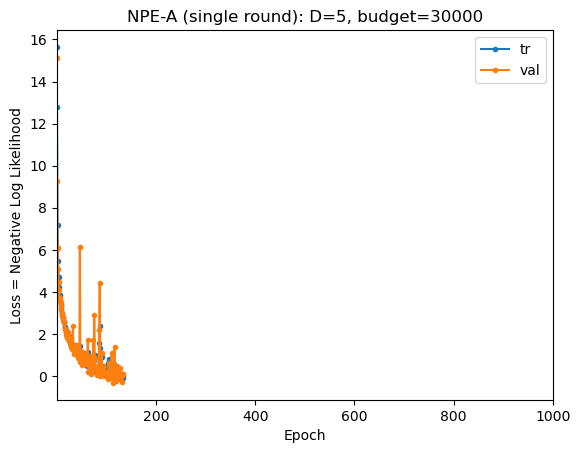

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'NPE-A (single round): D=5, budget=30000'}, xlabel='Epoch', ylabel='Loss = Negative Log Likelihood'>)

In [38]:
inference.plot_training_summary(budget=30_000)

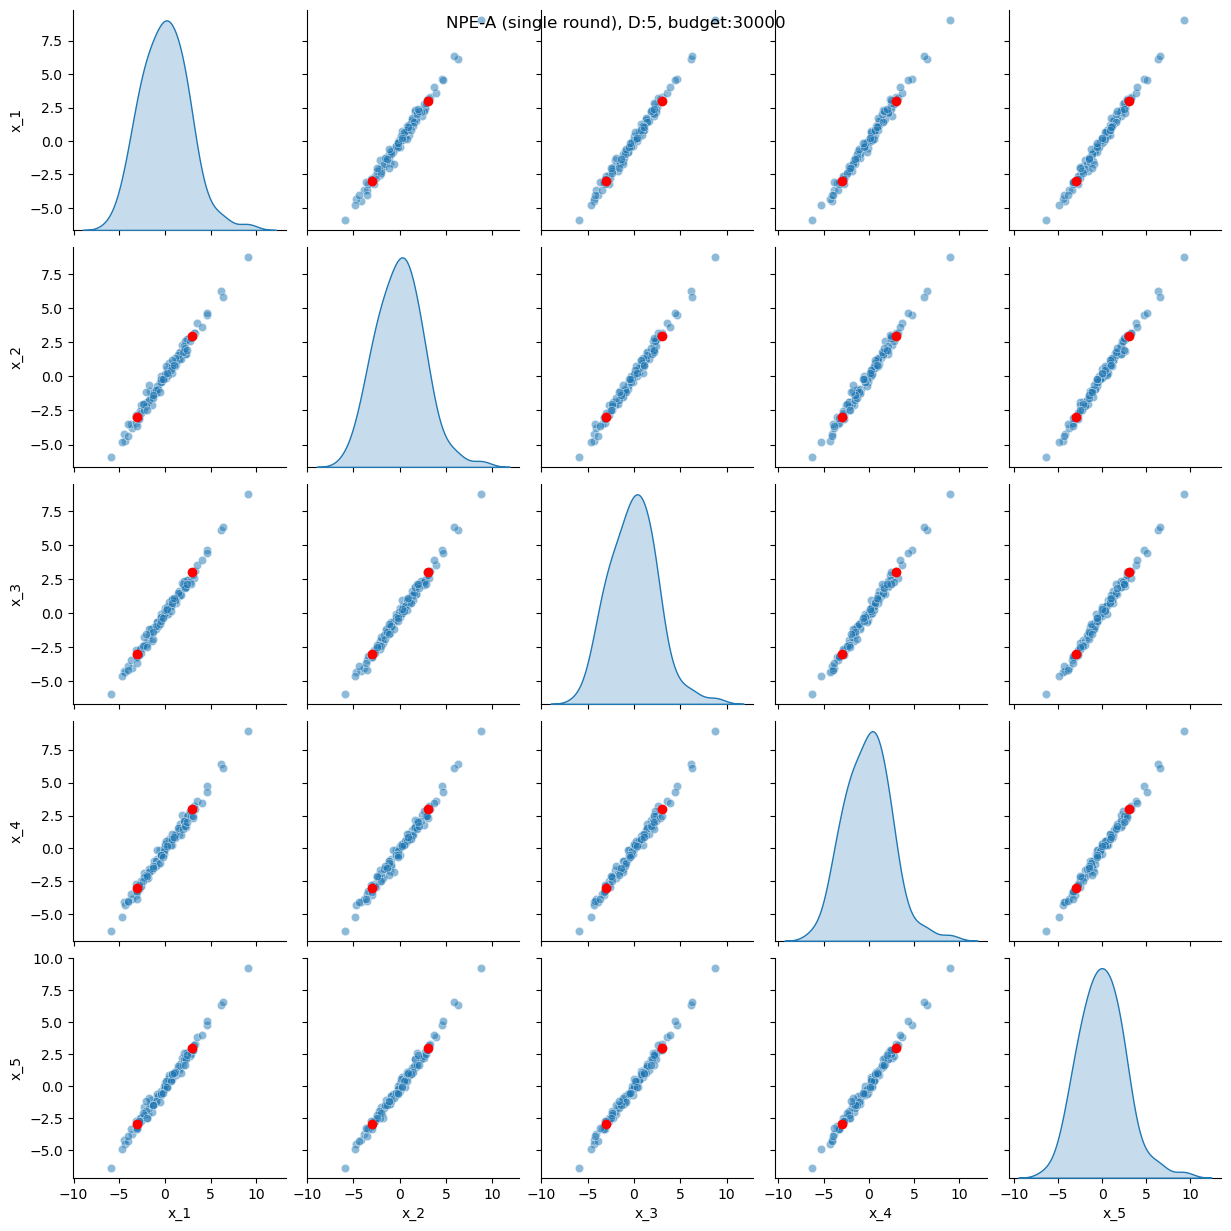

In [39]:
g = inference.plot_posterior_samples(
    samples=samples,
    budget=30000,
    posterior_modes=posterior_modes,
    subset_dims=[d for d in range(D)],
)

## D = 3

### budget: 5000

In [4]:
np.random.seed(21355)
torch.manual_seed(21)

In [5]:
D = 3
sim = lfi.simulators.BimodalGaussian(sigma_noise=0.1)
prior = lfi.priors.UniformPrior(low=-10, high=10, dim=D)
observation = np.zeros((1,D))
posterior_modes = np.ones((2,D))
posterior_modes[0, :] = -3
posterior_modes[1, :] = 3

In [6]:
inference = lfi.inference.from_sbi.NPEASingleRound(
    prior=prior.return_sbi_object(),
    simulator=sim.sample_pytorch,
    observation = observation,
)

In [7]:
samples, time = inference.fit_and_sample(budget=5000, num_samples=100)

  0%|          | 0/5000 [00:00<?, ?it/s]

 Neural network successfully converged after 97 epochs.

Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]


Training/Samling time: 16.93 seconds


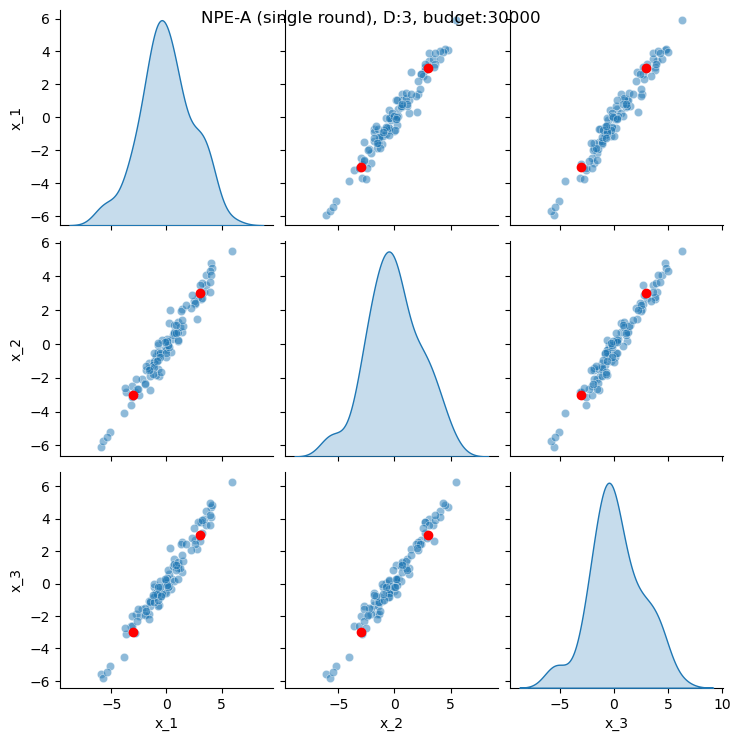

In [8]:
g = inference.plot_posterior_samples(
    samples=samples,
    budget=5000,
    posterior_modes=posterior_modes,
    subset_dims=[d for d in range(D)],
)

### budget: 10000

In [9]:
samples, time = inference.fit_and_sample(budget=10000, num_samples=100)

  0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 123 epochs.

Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]


Training/Samling time: 38.19 seconds


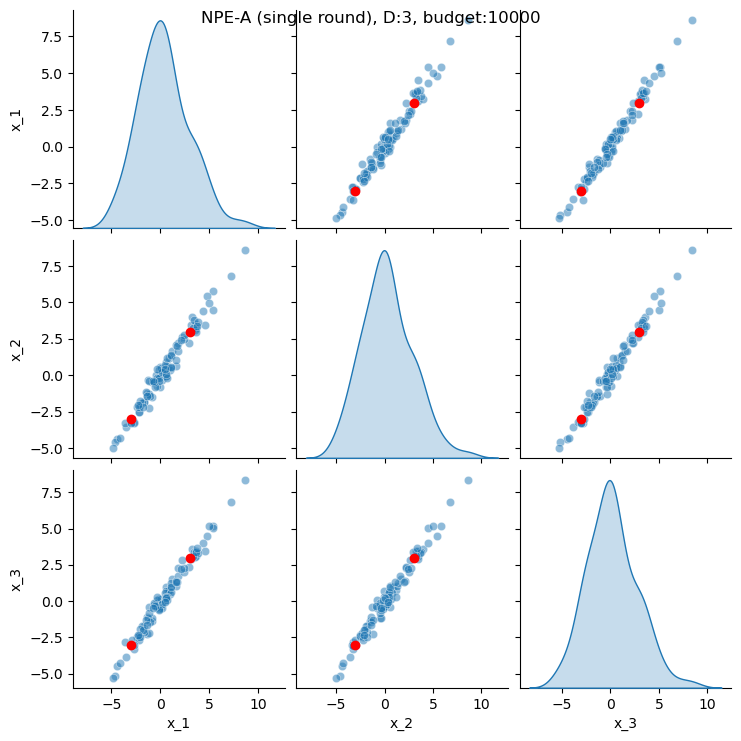

In [10]:
g = inference.plot_posterior_samples(
    samples=samples,
    budget=10000,
    posterior_modes=posterior_modes,
    subset_dims=[d for d in range(D)],
)

### budget: 20_000

In [11]:
samples, time = inference.fit_and_sample(budget=20000, num_samples=100)

  0%|          | 0/20000 [00:00<?, ?it/s]

 Neural network successfully converged after 114 epochs.

Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]


Training/Samling time: 72.37 seconds


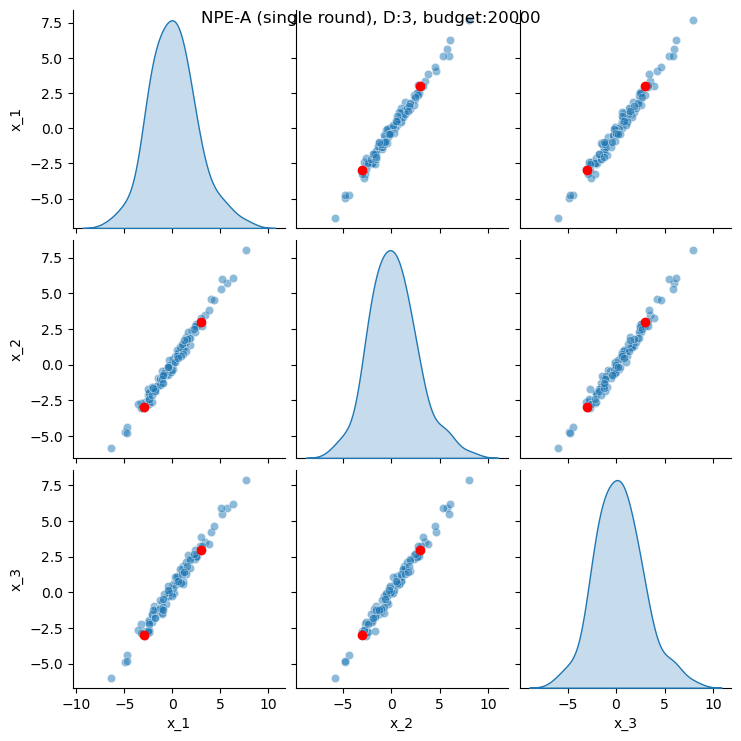

In [12]:
g = inference.plot_posterior_samples(
    samples=samples,
    budget=20000,
    posterior_modes=posterior_modes,
    subset_dims=[d for d in range(D)],
)

### budget: 30_000

In [25]:
np.random.seed(21355)
torch.manual_seed(21)

In [26]:
D = 3
sim = lfi.simulators.BimodalGaussian(sigma_noise=0.1)
prior = lfi.priors.UniformPrior(low=-10, high=10, dim=D)
observation = np.zeros((1,D))
posterior_modes = np.ones((2,D))
posterior_modes[0, :] = -3
posterior_modes[1, :] = 3

In [27]:
inference = lfi.inference.from_sbi.NPEASingleRound(
    prior=prior.return_sbi_object(),
    simulator=sim.sample_pytorch,
    observation = observation,
)

In [28]:
samples, time = inference.fit_and_sample(budget=30000, num_samples=100)

  0%|          | 0/30000 [00:00<?, ?it/s]

 Neural network successfully converged after 134 epochs.

Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]


Training/Sampling time: 126.21 seconds


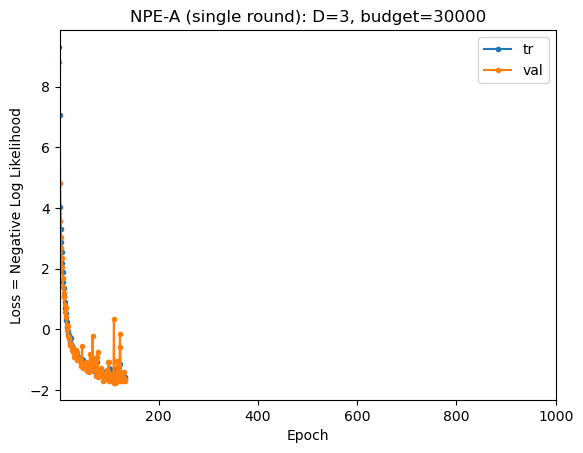

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'NPE-A (single round): D=3, budget=30000'}, xlabel='Epoch', ylabel='Loss = Negative Log Likelihood'>)

In [29]:
inference.plot_training_summary(budget=30_000)

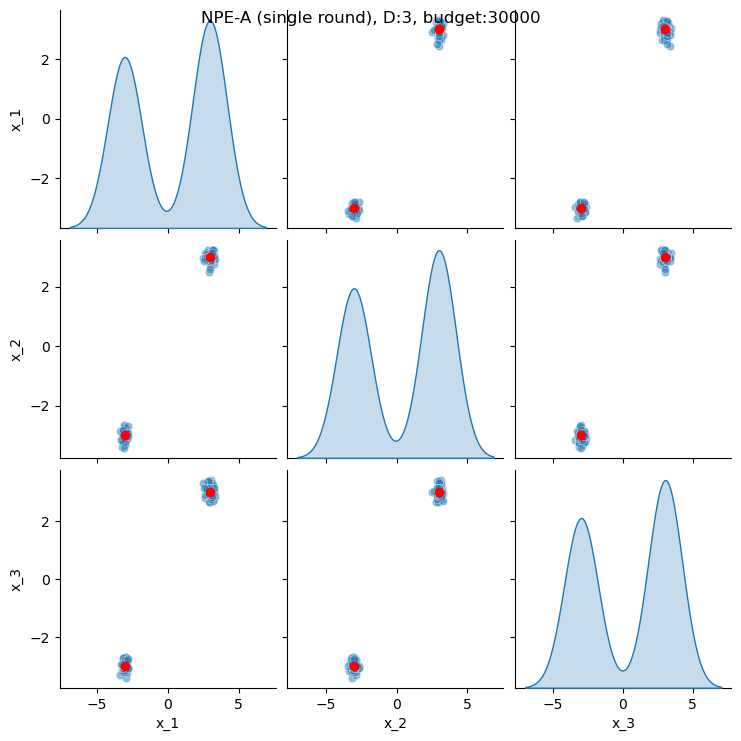

In [30]:
g = inference.plot_posterior_samples(
    samples=samples,
    budget=30000,
    posterior_modes=posterior_modes,
    subset_dims=[d for d in range(D)],
)